In [1]:
#import the libraries, this time i will be introducing the sklearn library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split #for splittling the data
from sklearn.preprocessing import OneHotEncoder #to get dummies
from sklearn.preprocessing import StandardScaler #to standardize

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
scaler = StandardScaler()

In [2]:
#Load the data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

display(train_df.head())
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
print(train_df.isnull().sum().sum())
print(test_df.isnull().sum().sum())

866
414


In [4]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [5]:
X_train = train_df.drop(columns='Survived')
y_train = train_df['Survived']
X_test = test_df.copy()

print(X_train.shape, y_train.shape, X_test.shape)

(891, 11) (891,) (418, 11)


In [6]:
def family(data1, data2):
    dataset = [data1, data2]
    dataset2 = []
    for df in dataset:
        duplicated_ticket = df[df['Ticket'].duplicated(keep=False)]
        grouped = duplicated_ticket.groupby('Ticket')
        data = {'Ticket': [], 'Family_size': []}
        for ticket, group in grouped:
            data['Ticket'].append(ticket)
            data['Family_size'].append(len(group))

        family = pd.DataFrame(data)
        df = df.merge(family, on='Ticket', how='left')
        dataset2.append(df)
    datas = tuple(dataset2)
    return datas

In [7]:
X_train, X_test = family(X_train, X_test)
print(X_train.shape, X_test.shape)

(891, 12) (418, 12)


In [8]:
display(X_train.head())
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


In [9]:
# X_test[~X_test['Family_size'].isnull()]
X_test[X_test['Ticket'] == '21228']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S,2.0
287,1179,1,"Snyder, Mr. John Pillsbury",male,24.0,1,0,21228,82.2667,B45,S,2.0


In [10]:
def process_missing(data1, data2):
    """
    Handle missing values for train (data1) and test (data2).
    Ensures imputations are based on TRAIN only to avoid data leakage.
    """
    # -----------------
    # Cabin missing
    # -----------------
    data1['Cabin_status'] = np.where(data1['Cabin'].isnull(), 'unknown', 'known')
    data1.drop(labels=['Cabin'], axis=1, inplace=True)

    data2['Cabin_status'] = np.where(data2['Cabin'].isnull(), 'unknown', 'known')
    data2.drop(labels=['Cabin'], axis=1, inplace=True)

    # -----------------
    # Family_size missing
    # -----------------
    data1['Alone'] = np.where(data1['Family_size'].isnull(), 'Yes', 'No')
    data1['Family_size'] = data1['Family_size'].fillna(1).astype('int64')

    data2['Alone'] = np.where(data2['Family_size'].isnull(), 'Yes', 'No')
    data2['Family_size'] = data2['Family_size'].fillna(1).astype('int64')

    # -----------------
    # Embarked missing
    # -----------------
    data1['Embarked_nan'] = np.where(data1['Embarked'].isnull(), 1, 0)
    embarked_mode = data1['Embarked'].mode()[0]   # mode from TRAIN
    data1['Embarked'] = data1['Embarked'].fillna(embarked_mode)

    data2['Embarked_nan'] = np.where(data2['Embarked'].isnull(), 1, 0)
    data2['Embarked'] = data2['Embarked'].fillna(embarked_mode)  # use train mode

    # -----------------
    # Age missing (group-based imputation)
    # -----------------
    # Add missing indicators
    data1['Age_nan'] = np.where(data1['Age'].isnull(), 1, 0)
    data2['Age_nan'] = np.where(data2['Age'].isnull(), 1, 0)

    # Compute group medians on TRAIN only
    age_medians = data1.groupby(['Pclass', 'Sex'])['Age'].median()
    global_median = data1['Age'].median()

    # Impute train
    train_keys = pd.Series(list(zip(data1['Pclass'], data1['Sex'])), index=data1.index)
    group_medians_train = train_keys.map(age_medians)
    data1['Age'] = data1['Age'].fillna(group_medians_train).fillna(global_median)

    # Impute test (using TRAIN medians only)
    test_keys = pd.Series(list(zip(data2['Pclass'], data2['Sex'])), index=data2.index)
    group_medians_test = test_keys.map(age_medians)
    data2['Age'] = data2['Age'].fillna(group_medians_test).fillna(global_median)

    return data1, data2

In [11]:
X_train, X_test = process_missing(X_train, X_test)
print(X_train.isnull().sum().sum())
print(X_test.isnull().sum().sum())

0
1


In [12]:
X_test[X_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,Cabin_status,Alone,Embarked_nan,Age_nan
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,1,unknown,Yes,0,0


In [13]:
X_test.dropna(ignore_index=True, inplace=True)
X_test.isnull().sum().sum()

np.int64(0)

In [14]:
def categorical_encoding(data1, data2):
    # Copy to avoid modifying original
    data1 = data1.copy()
    data2 = data2.copy()

    # =============================
    # 1. Sex encoding (binary map)
    # =============================
    sex = {'female': 0, 'male': 1}
    data1['Sex'] = data1['Sex'].map(sex)
    data2['Sex'] = data2['Sex'].map(sex)

    # =============================
    # 2. Cabin status encoding (binary map)
    # =============================
    cabin = {'unknown': 0, 'known': 1}
    data1['Cabin_status'] = data1['Cabin_status'].map(cabin)
    data2['Cabin_status'] = data2['Cabin_status'].map(cabin)

    # =============================
    # 3. Alone status encoding (binary map)
    # =============================
    alone = {'Yes': 1, 'No': 0}
    data1['Alone'] = data1['Alone'].map(alone)
    data2['Alone'] = data2['Alone'].map(alone)

    # =============================
    # 3. Embarked (OneHotEncode)
    # =============================
    # ohe_embarked = OneHotEncoder(handle_unknown="ignore", sparse=False)
    ohe.fit(data1[['Embarked']])  # fit only on train

    embarked_train = ohe.transform(data1[['Embarked']])
    embarked_test = ohe.transform(data2[['Embarked']])

    cols_embarked = ohe.get_feature_names_out(['Embarked'])
    embarked_train_df = pd.DataFrame(embarked_train, columns=cols_embarked, index=data1.index)
    embarked_test_df = pd.DataFrame(embarked_test, columns=cols_embarked, index=data2.index)

    data1 = pd.concat([data1.drop('Embarked', axis=1), embarked_train_df], axis=1)
    data2 = pd.concat([data2.drop('Embarked', axis=1), embarked_test_df], axis=1)

    # =============================
    # 4. Title Extraction
    # =============================
    data1['Title'] = data1['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
    data2['Title'] = data2['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

    # Replace rare titles with "Other" (based on TRAIN only)
    rare_titles = [title for title, count in data1['Title'].value_counts().items() if count < 10]
    data1['Title'] = data1['Title'].replace(rare_titles, 'Other')
    data2['Title'] = data2['Title'].replace(rare_titles, 'Other')

    # =============================
    # 5. Title (OneHotEncode)
    # =============================
    # ohe_title = OneHotEncoder(handle_unknown="ignore", sparse=False)
    ohe.fit(data1[['Title']])  # fit only on train

    title_train = ohe.transform(data1[['Title']])
    title_test = ohe.transform(data2[['Title']])

    cols_title = ohe.get_feature_names_out(['Title'])
    title_train_df = pd.DataFrame(title_train, columns=cols_title, index=data1.index)
    title_test_df = pd.DataFrame(title_test, columns=cols_title, index=data2.index)

    data1 = pd.concat([data1.drop('Title', axis=1), title_train_df], axis=1)
    data2 = pd.concat([data2.drop('Title', axis=1), title_test_df], axis=1)

    # =============================
    # 6. Drop [Name, Ticket, PassengerId] columns (since Title extracted)
    # =============================
    data1.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
    data2.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

    return data1, data2

In [15]:
X_train, X_test = categorical_encoding(X_train, X_test)
display(X_train.head(3))
X_test.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Family_size,Cabin_status,Alone,Embarked_nan,Age_nan,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,3,1,22.0,1,0,7.2500,1,0,1,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,0,38.0,1,0,71.2833,1,1,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,0,26.0,0,0,7.9250,1,0,1,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


,Pclass,Sex,Age,SibSp,Parch,Fare,Family_size,Cabin_status,Alone,Embarked_nan,Age_nan,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,3,1,34.5,0,0,7.8292,1,0,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,0,47.0,1,0,7.0000,1,0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,1,62.0,0,0,9.6875,1,0,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
def scale_age_fare(train, test, drop_age=False, drop_original_fare=True):
    """
    Scale Age and log+scale Fare for train and test.
    - drop_age: if True, drop the original Age column after scaling.
    - drop_original_fare: if True, drop raw Fare and intermediate Fare_log.
    - return_scaler: if True, return the fitted StandardScaler object.
    """
    train = train.copy()
    test  = test.copy()

    # create log fare
    train['Fare_log'] = np.log1p(train['Fare'])
    test['Fare_log']  = np.log1p(test['Fare'])

    cols_to_scale = ['Age', 'Fare_log']

    # fit scaler on train only
    # scaler = StandardScaler()
    scaler.fit(train[cols_to_scale])

    # transform both sets
    train_scaled = scaler.transform(train[cols_to_scale])
    test_scaled  = scaler.transform(test[cols_to_scale])

    scaled_cols = [f'{c}_scaled' for c in cols_to_scale]
    train[scaled_cols] = train_scaled
    test[scaled_cols]  = test_scaled

    # optional drops
    if drop_original_fare:
        train.drop(['Fare', 'Fare_log'], axis=1, inplace=True)
        test.drop(['Fare', 'Fare_log'], axis=1, inplace=True)

    if drop_age:
        train.drop('Age', axis=1, inplace=True)
        test.drop('Age', axis=1, inplace=True)

    return train, test

In [17]:
X_train, X_test = scale_age_fare(X_train, X_test)
display(X_train.head(3))
X_test.head(3)

,Pclass,Sex,Age,SibSp,Parch,Family_size,Cabin_status,Alone,Embarked_nan,Age_nan,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Age_scaled,Fare_log_scaled
0,3,1,22.0,1,0,1,0,1,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.534891,-0.879741
1,1,0,38.0,1,0,1,1,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.668392,1.361220
2,3,0,26.0,0,0,1,0,1,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.234070,-0.798540


,Pclass,Sex,Age,SibSp,Parch,Family_size,Cabin_status,Alone,Embarked_nan,Age_nan,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Age_scaled,Fare_log_scaled
0,3,1,34.5,0,0,1,0,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.405174,-0.809683
1,3,0,47.0,1,0,1,0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.345238,-0.911513
2,2,1,62.0,0,0,1,0,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.473316,-0.612461


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

In [19]:
models = {
        "Logistic Regression": LogisticRegression(max_iter=3000),
        "Naive Bayes": GaussianNB(),
        "KNN": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42)
}

print(models)

{'Logistic Regression': LogisticRegression(max_iter=3000), 'Naive Bayes': GaussianNB(), 'KNN': KNeighborsClassifier(), 'Decision Tree': DecisionTreeClassifier(random_state=42), 'Random Forest': RandomForestClassifier(random_state=42)}


In [20]:
test2_df = pd.read_csv(r"C:\Users\KOLADE\OneDrive\Documents\Practices\Titanic\Test.csv")
test2_df.head()

,Pclass,Sex,Age,SibSp,Parch,Family_size,Cabin_status,Alone,Embarked_nan,Age_nan,...,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Age_scaled,Fare_log_scaled,Survived
0,3,1,26.0,1,1,2,0,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.232122,-0.175318,1
1,2,1,31.0,0,0,1,0,1,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.146610,-0.535177,0
2,3,1,20.0,0,0,1,0,1,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.686599,-0.799211,0
3,2,0,6.0,0,1,3,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-1.747047,0.593927,1
4,3,0,14.0,1,0,2,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.141077,-0.470076,1


In [21]:
display(X_train.info())
test2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pclass           891 non-null    int64  
 1   Sex              891 non-null    int64  
 2   Age              891 non-null    float64
 3   SibSp            891 non-null    int64  
 4   Parch            891 non-null    int64  
 5   Family_size      891 non-null    int64  
 6   Cabin_status     891 non-null    int64  
 7   Alone            891 non-null    int64  
 8   Embarked_nan     891 non-null    int64  
 9   Age_nan          891 non-null    int64  
 10  Embarked_C       891 non-null    float64
 11  Embarked_Q       891 non-null    float64
 12  Embarked_S       891 non-null    float64
 13  Title_Master     891 non-null    float64
 14  Title_Miss       891 non-null    float64
 15  Title_Mr         891 non-null    float64
 16  Title_Mrs        891 non-null    float64
 17  Title_Other     

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pclass           295 non-null    int64  
 1   Sex              295 non-null    int64  
 2   Age              295 non-null    float64
 3   SibSp            295 non-null    int64  
 4   Parch            295 non-null    int64  
 5   Family_size      295 non-null    int64  
 6   Cabin_status     295 non-null    int64  
 7   Alone            295 non-null    int64  
 8   Embarked_nan     295 non-null    int64  
 9   Age_nan          295 non-null    int64  
 10  Embarked_C       295 non-null    float64
 11  Embarked_Q       295 non-null    float64
 12  Embarked_S       295 non-null    float64
 13  Title_Master     295 non-null    float64
 14  Title_Miss       295 non-null    float64
 15  Title_Mr         295 non-null    float64
 16  Title_Mrs        295 non-null    float64
 17  Title_Other     

In [22]:
def evaluate_models(model, X_train_df, y_train_df, X_test_df, y_test_df):
    model.fit(X_train_df, y_train_df)
    y_pred = model.predict(X_test_df)
    y_proba = model.predict_proba(X_test_df)[:, 1]

    print(f"Train Accuracy: {model.score(X_train_df, y_train_df)}")
    print(f"Test Accuracy: {accuracy_score(y_test_df, y_pred)}")
    print("ROC-AUC:", roc_auc_score(y_test_df, y_proba))

In [23]:
X_test2 = test2_df.drop('Survived', axis=1)
y_test2 = test2_df['Survived']
print(X_test2.shape, y_test2.shape)

(295, 20) (295,)


In [24]:
for name, model in models.items():
    print(f"Model: {name}")
    evaluate_models(model, X_train, y_train, X_test2, y_test2)
    print("**" * 25)

Model: Logistic Regression
Train Accuracy: 0.835016835016835
Test Accuracy: 0.8508474576271187
ROC-AUC: 0.9065238095238096
**************************************************
Model: Naive Bayes
Train Accuracy: 0.8058361391694725
Test Accuracy: 0.8033898305084746
ROC-AUC: 0.8788095238095238
**************************************************
Model: KNN
Train Accuracy: 0.8451178451178452
Test Accuracy: 0.8983050847457628
ROC-AUC: 0.9585238095238096
**************************************************
Model: Decision Tree
Train Accuracy: 0.9876543209876543
Test Accuracy: 0.9661016949152542
ROC-AUC: 0.9671904761904763
**************************************************
Model: Random Forest
Train Accuracy: 0.9876543209876543
Test Accuracy: 0.9932203389830508
ROC-AUC: 0.9995
**************************************************


In [25]:
# KNN
knn_params = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ["uniform", "distance"],
    "p": [1, 2]   # 1 = Manhattan, 2 = Euclidean
}

# Decision Tree
dt_params = {
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}

# Random Forest
rf_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

# KNN GridSearch
knn_grid = GridSearchCV(KNeighborsClassifier(),
                        param_grid=knn_params,
                        cv=5,
                        scoring="roc_auc",
                        n_jobs=-1)

# Decision Tree GridSearch
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                       param_grid=dt_params,
                       cv=5,
                       scoring="roc_auc",
                       n_jobs=-1)

# Random Forest GridSearch
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid=rf_params,
                       cv=5,
                       scoring="roc_auc",
                       n_jobs=-1)


In [26]:
grids = {
    "KNN": knn_grid,
    "Decision Tree": dt_grid,
    "Random Forest": rf_grid
}

for name, grid in grids.items():
    print(f"🔎 Tuning {name} ...")
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    y_predict = best_model.predict(X_test2)
    y_prob = best_model.predict_proba(X_test2)[:, 1]

    print(f"Best Params: {grid.best_params_}")
    print("Best CV Score:", grid.best_score_)
    print(f"Train Accuracy: {best_model.score(X_train, y_train):.4f}")
    print(f"Test Accuracy: {best_model.score(X_test2, y_test2):.4f}")
    print(f"Test Accuracy: {accuracy_score(y_test2, y_predict):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test2, y_prob):.4f}")
    print("**" * 30)

🔎 Tuning KNN ...
Best Params: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best CV Score: 0.844254332076958
Train Accuracy: 0.9877
Test Accuracy: 0.9831
Test Accuracy: 0.9831
ROC-AUC: 0.9993
************************************************************
🔎 Tuning Decision Tree ...
Best Params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Score: 0.8512638480347718
Train Accuracy: 0.8215
Test Accuracy: 0.8305
Test Accuracy: 0.8305
ROC-AUC: 0.8860
************************************************************
🔎 Tuning Random Forest ...
Best Params: {'bootstrap': False, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best CV Score: 0.8783427739228555
Train Accuracy: 0.8541
Test Accuracy: 0.8610
Test Accuracy: 0.8610
ROC-AUC: 0.9343
************************************************************


### Feature Importance

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

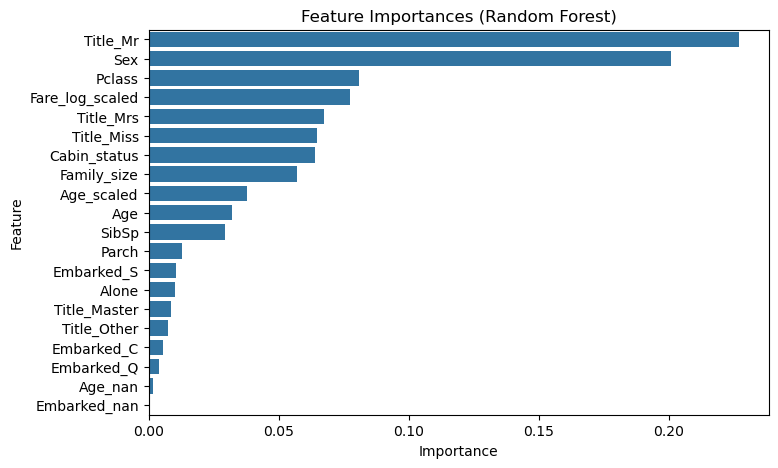

In [29]:
importances = rf_grid.best_estimator_.feature_importances_
feat_df = pd.DataFrame({"Feature": X_train.columns, "Importance": importances})
feat_df = feat_df.sort_values("Importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feat_df)
plt.title("Feature Importances (Random Forest)")
plt.show()

In [32]:
rf = RandomForestClassifier(**rf_grid.best_params_, random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring="roc_auc")
print("Cross-Validation ROC-AUC scores:", cv_scores)
print("Mean ROC-AUC:", cv_scores.mean())

Cross-Validation ROC-AUC scores: [0.87259552 0.83596257 0.88382353 0.8848262  0.91450605]
Mean ROC-AUC: 0.8783427739228555


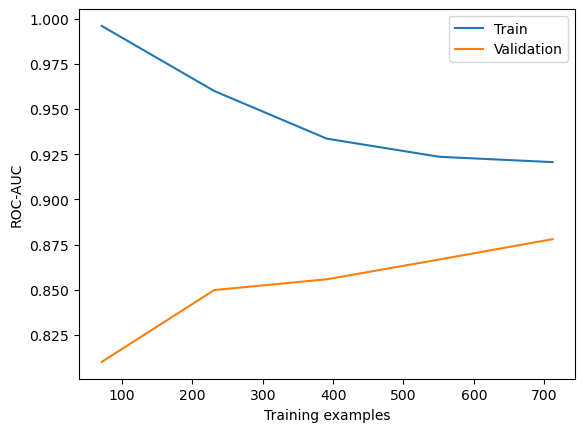

In [33]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train, y_train, cv=5, scoring="roc_auc", n_jobs=-1
)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Train")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Validation")
plt.xlabel("Training examples")
plt.ylabel("ROC-AUC")
plt.legend()
plt.show()

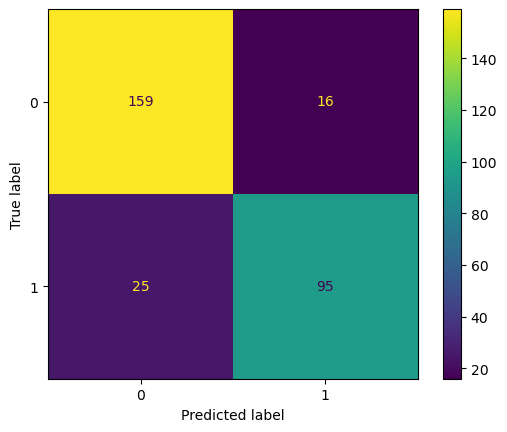

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = rf_grid.best_estimator_.predict(X_test2)
cm = confusion_matrix(y_test2, y_pred)
ConfusionMatrixDisplay(cm).plot()

### Pickling the Model file for Deployment

In [36]:
import pickle

In [41]:
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.8540965207631874

In [42]:
pickle.dump(rf, open('titanic_model.pkl', 'wb'))

In [43]:
pickled_model = pickle.load(open('titanic_model.pkl', 'rb'))

In [44]:
pickled_model.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,

#### Save with joblib

In [45]:
import joblib

In [46]:
joblib.dump(rf_grid.best_estimator_, "titanic_model2.pkl")

['titanic_model2.pkl']

In [48]:
model = joblib.load("titanic_model2.pkl")

In [49]:
model.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,

In [50]:
np.array_equal(pickled_model.predict(X_test), model.predict(X_test))

True